# 📊 Programming Language Popularity Analysis – Preliminary Exploration

In this section, we will:
1. Import the dataset into a Pandas DataFrame.
2. Assign proper column names.
3. Explore the structure of the dataset (first/last rows, dimensions, counts).
4. Move to the challenge: counting posts per programming language and analyzing availability of posts over months.

### Import Statements


In [4]:
# Pandas is used for data manipulation, NumPy for numerical operations (if needed).
import pandas as pd

# Load dataset
df = pd.read_csv(
    'QueryResults.csv',
    names=['DATE', 'TAG', 'POSTS'],  # Assigning descriptive column names
    header=0                         # Skips the first row as header since we provide our own names
)

# Display basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


### 🔍 Why `names` and `header`?
- `names` allows us to provide custom column names (`DATE`, `TAG`, `POSTS`).
- `header=0` tells Pandas to skip the first row as the column header, because we are overriding with our own names.


### Preview the dataset

In [5]:
# First 5 rows
print("First 5 rows: ")
display(df.head())

# Last 5 rows
print("Last 5 rows: ")
display(df.tail())

First 5 rows: 


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


Last 5 rows: 


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


### 🔍 Why `.head()` and `.tail()`?
- `.head()` helps us check the first few rows → verify column names & general structure.
- `.tail()` helps us see the last few rows → ensure dataset was read correctly and covers full time range.



### Shape of the dataset

In [6]:
# Give number of rows and columns (rows, cols)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns. ")

The dataset has 1991 rows and 3 columns. 


### 🔍 Why `.shape`?
- `.shape` quickly shows the dimensionality of the dataset.
- In our case: **1991 rows × 3 columns**.



### Count non-null entries per column

In [7]:
print("Non-null entry count per column: ")
print(df.count())

Non-null entry count per column: 
DATE     1991
TAG      1991
POSTS    1991
dtype: int64


### 🔍 Why `.count()`?
- `.count()` shows the number of **non-NaN values** in each column.
- Useful for checking if any column has missing values..



## Language Post Counts
Now that we’ve explored the dataset, let’s move to the challenge:

1. **Count total posts per programming language** → Which language is the most popular since Stack Overflow’s creation?  
2. **Count the number of months of data available for each language** → Older languages (like C) will appear throughout, newer ones (like Swift) only from their release.

In [8]:
# Count total posts per programming language

# Group by TAG (language) and sum the POSTS
total_posts = df.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)

print("Total number of posts per programming language:")
display(total_posts)

# Find the most popular language
most_popular_language = total_posts.idxmax()
most_posts = total_posts.max()
print(f"\n🔥 The most popular language is '{most_popular_language}' with {most_posts} posts.")

Total number of posts per programming language:


TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POSTS, dtype: int64


🔥 The most popular language is 'javascript' with 2056510 posts.


### 🔍 Explanation
- `groupby('TAG')` groups data by programming language.
- `sum()` aggregates total posts across all months for each language.
- `sort_values()` sorts languages in descending order of total posts.
- `idxmax()` and `max()` help us identify the language with the maximum posts.



### Count number of months with data for each language


In [9]:

# Group by TAG and count the DATE values (each unique DATE = one month)
months_per_language = df.groupby('TAG')['DATE'].count().sort_values(ascending=False)

print("Number of months of posts per programming language:")
display(months_per_language)

Number of months of posts per programming language:


TAG
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
r             142
swift         135
go            129
Name: DATE, dtype: int64

### 🔍 Explanation
- `groupby('TAG')['DATE'].count()` counts the number of rows (months) for each language.  
- This helps us see how many months of data exist for each language.  
- Older languages (like C#, Java, Python) will have entries from the start (2008),  
while newer ones (like Swift) will only appear later.  

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

### 🧹 Data Cleaning: Working with Time Stamps

In this section, we will:
1. Select an individual cell from the `DATE` column to inspect it.
2. Check its data type.
3. Convert the `DATE` column from string to a proper **Datetime object** using `pd.to_datetime()`.

In [10]:
# 🛠️ Step 1: Select an individual cell from the 'DATE' column

# Option 1: Using square bracket notation
print("DATE entry using square bracket notation:", df['DATE'][1])

# Option 2: Using dot notation (works if column name has no spaces)
print("DATE entry using dot notation:", df.DATE[1])

DATE entry using square bracket notation: 2008-08-01 00:00:00
DATE entry using dot notation: 2008-08-01 00:00:00


### 🔍 Explanation
- `df['DATE'][1]` selects the second element in the `DATE` column (index 1).
- `df.DATE[1]` is shorthand dot-notation for the same purpose.  
⚠️ Dot-notation only works if the column name does not contain spaces or special characters.  
👉 Square bracket notation is generally preferred because it’s **more flexible** and works in all cases.

In [12]:
# 🛠️ Step 2: Inspect the data type of the DATE entry

# Check the type of the second entry in DATE column
print("Data type of DATE[1]:", type(df['DATE'][1]))

Data type of DATE[1]: <class 'str'>


### 🔍 Explanation
- We see that the `DATE` values are stored as **strings** (not datetime objects).
- This is inconvenient because:
  - Strings always display unnecessary `"00:00:00"`.
  - We cannot directly use date-related functionality (like extracting year, month, filtering by ranges).

In [14]:
# 🛠️ Step 3: Convert one cell into a Datetime object using Pandas

# Convert just one entry into datetime
single_date = pd.to_datetime(df['DATE'][1])
print("Converted DATE[1]:", single_date)
print("Data type after conversion:", type(single_date))

Converted DATE[1]: 2008-08-01 00:00:00
Data type after conversion: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### 🔍 Explanation
- `pd.to_datetime()` converts a string into a **Timestamp** object.
- Now Python knows it’s a date and can handle date/time operations.

In [15]:
# 🛠️ Step 4: Convert the entire 'DATE' column to datetime format

df['DATE'] = pd.to_datetime(df['DATE'])

# Verify conversion by checking data types
print(df.info())

# Preview the first few rows again
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB
None


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


### 🔍 Explanation
- `df['DATE'] = pd.to_datetime(df['DATE'])` applies the conversion to the **entire column**.
- After this:
  - `DATE` column entries are stored as `datetime64` objects.
  - We can now leverage **Pandas datetime functionality** (extracting year, month, resampling, plotting time-series, etc.).

## 🔄 Data Manipulation: Pivoting DataFrames

In this section, we will:
1. Practice pivoting with a small toy dataset (`test_df`).
2. Pivot our main `df` DataFrame so that each programming language has its own column.
3. Inspect the reshaped DataFrame (rows, columns, head, tail).
4. Handle missing values (`NaN`) by replacing them with `0`.


In [16]:
# 🛠️ Example DataFrame
test_df = pd.DataFrame({
    'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
    'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
    'Power': [100, 80, 25, 50, 99, 75, 5, 30]
})

# Display original DataFrame
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [17]:
# 🛠️ Pivoting example
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')

pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


### 🔍 Explanation
- `index='Age'` → rows will be **Young / Old**.  
- `columns='Actor'` → each actor becomes a column.  
- `values='Power'` → the values inside the table are the power scores.  

⚠️ If any combination is missing (e.g., Old Sylvester didn’t have a score), Pandas will insert **NaN**.

### Pivoting Our Main DataFrame

In [18]:
# 🛠️ Pivot the Stack Overflow dataset
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

# Preview the pivoted DataFrame
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [19]:
# 🛠️ Check dimensions (rows, columns)
print(f"Reshaped DataFrame has {reshaped_df.shape[0]} rows and {reshaped_df.shape[1]} columns.")

Reshaped DataFrame has 145 rows and 14 columns.


In [20]:
# 🛠️ Inspect the head and tail
print("First 5 rows:")
display(reshaped_df.head())

print("Last 5 rows:")
display(reshaped_df.tail())

First 5 rows:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


Last 5 rows:


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [21]:
# 🛠️ Print the column names (languages)
print("Programming language columns:")
print(list(reshaped_df.columns))

Programming language columns:
['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']


In [22]:
# 🛠️ Count entries per column (non-NaN values)
print("Non-NaN counts per programming language:")
print(reshaped_df.count())

Non-NaN counts per programming language:
TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64


### 🔍 Observations
- Each programming language has become its own column.  
- The number of rows corresponds to the number of **months** in the dataset.  
- Some languages have fewer entries (e.g., Swift) because they were introduced later.  
- Missing values are represented as **NaN**.

### Dealing with NaN Values

In [23]:
# 🛠️ Replace NaN values with 0
reshaped_df.fillna(0, inplace=True)

# Verify if any NaN values remain
reshaped_df.isna().values.any()

False

### 🔍 Explanation
- `.fillna(0, inplace=True)` replaces all NaN values with `0`.  
- This makes sense in our context: if no posts were tagged with a language in a month, the count should be 0.  
- The check `.isna().values.any()` returns `False` if no NaN values are left.

# Data Visualisaton with with Matplotlib


In [24]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Just to make sure DataFrames display nicely
pd.set_option('display.max_columns', None)

In [25]:
# Preview the reshaped DataFrame (created from the pivot lesson)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


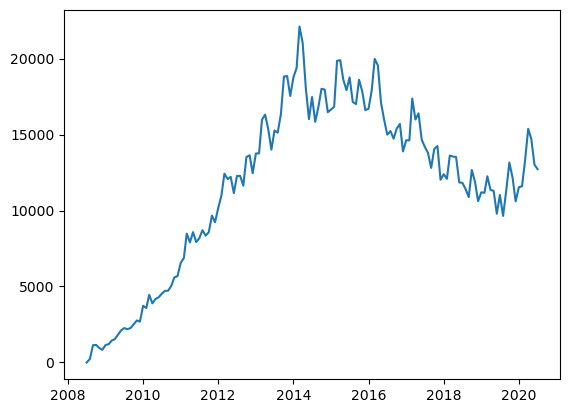

In [26]:
# Plot the popularity of Java posts over time
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.show()

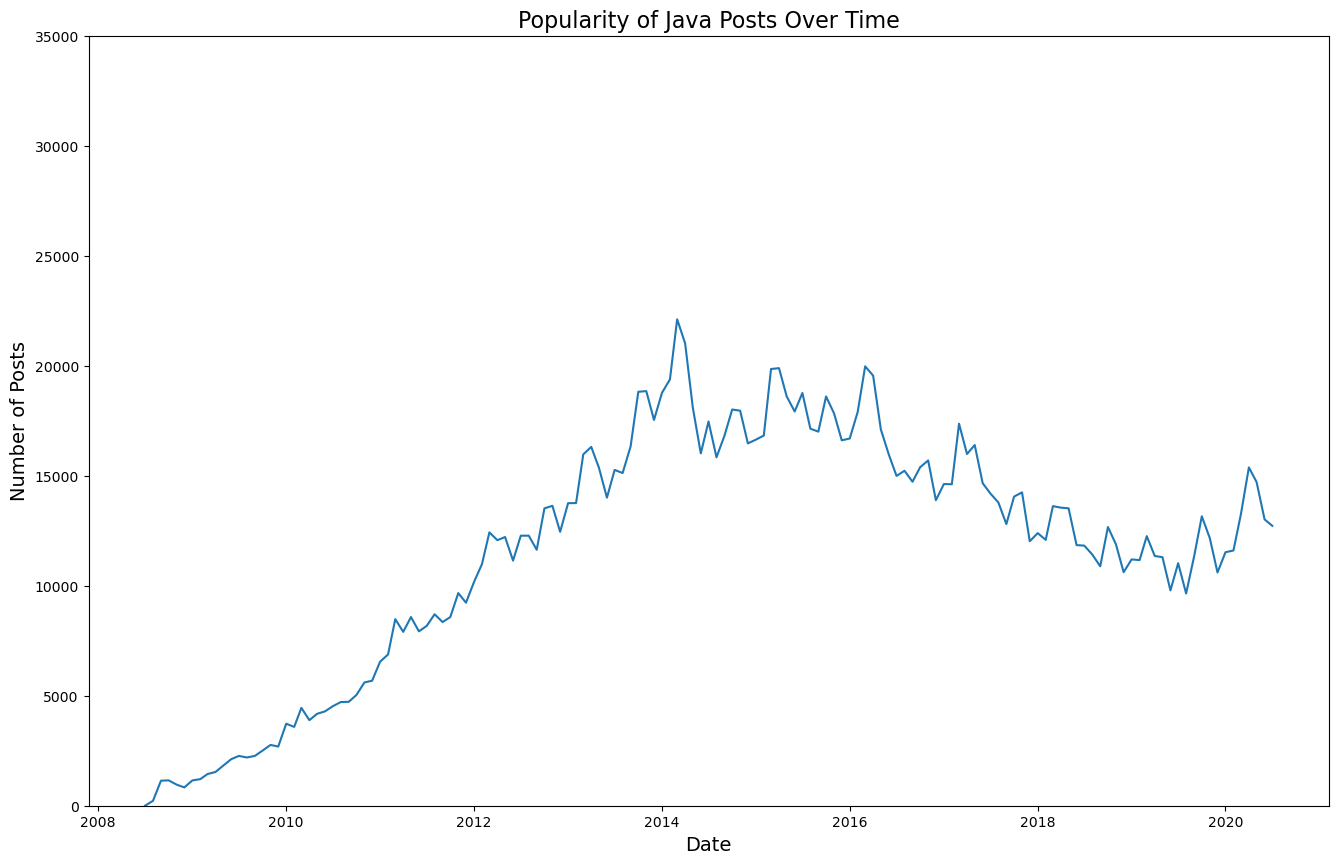

In [27]:
# Resize, add labels, and adjust style
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df['java'])

# Add labels and style
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)  # since posts can't go below 0

plt.title("Popularity of Java Posts Over Time", fontsize=16)
plt.show()

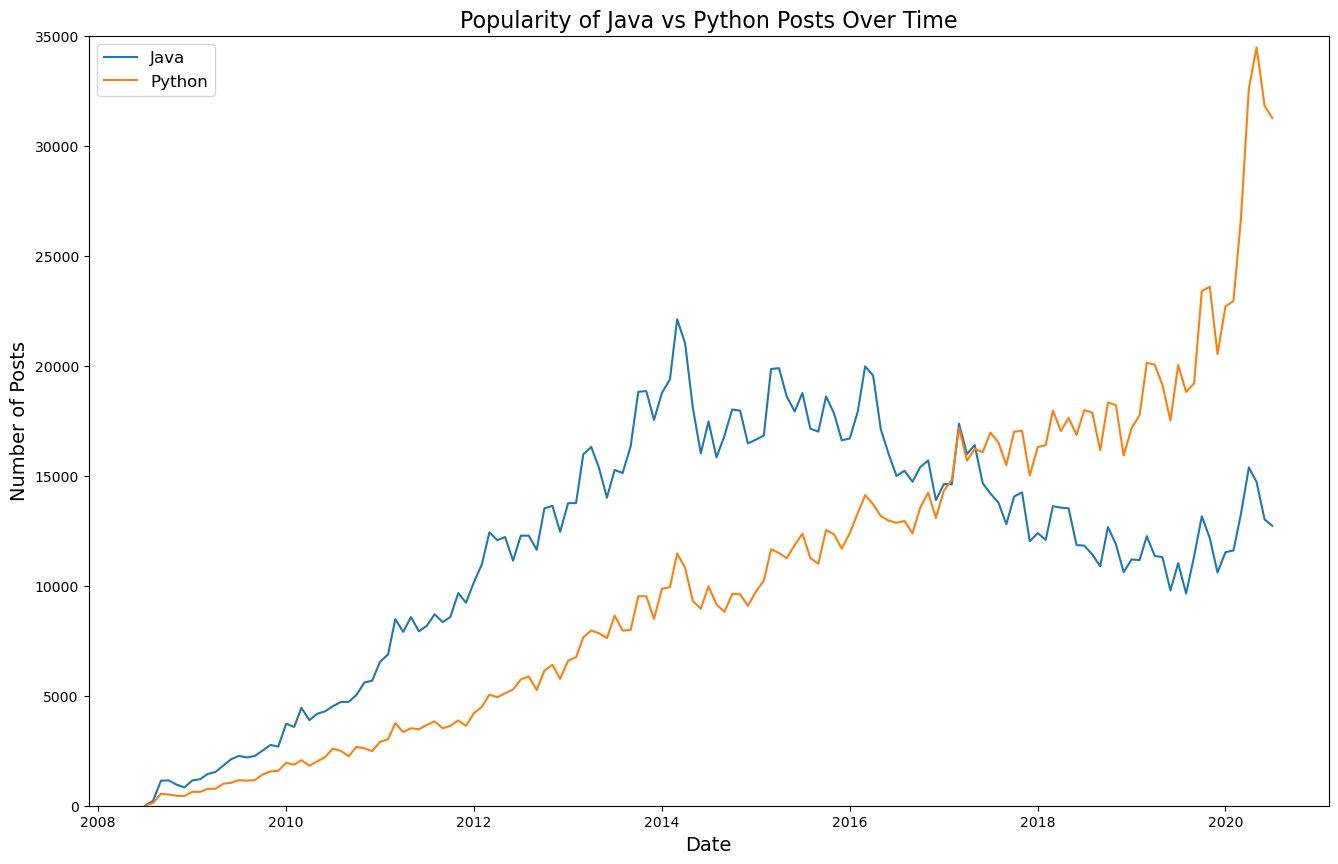

In [28]:
# Plot both Java and Python posts together
plt.figure(figsize=(16,10))

plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')

# Labels, legend, and style
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title("Popularity of Java vs Python Posts Over Time", fontsize=16)
plt.legend(fontsize=12)

plt.show()

## Multi-Line Charts with Matplotlib



### 1: Plotting Java and Python together

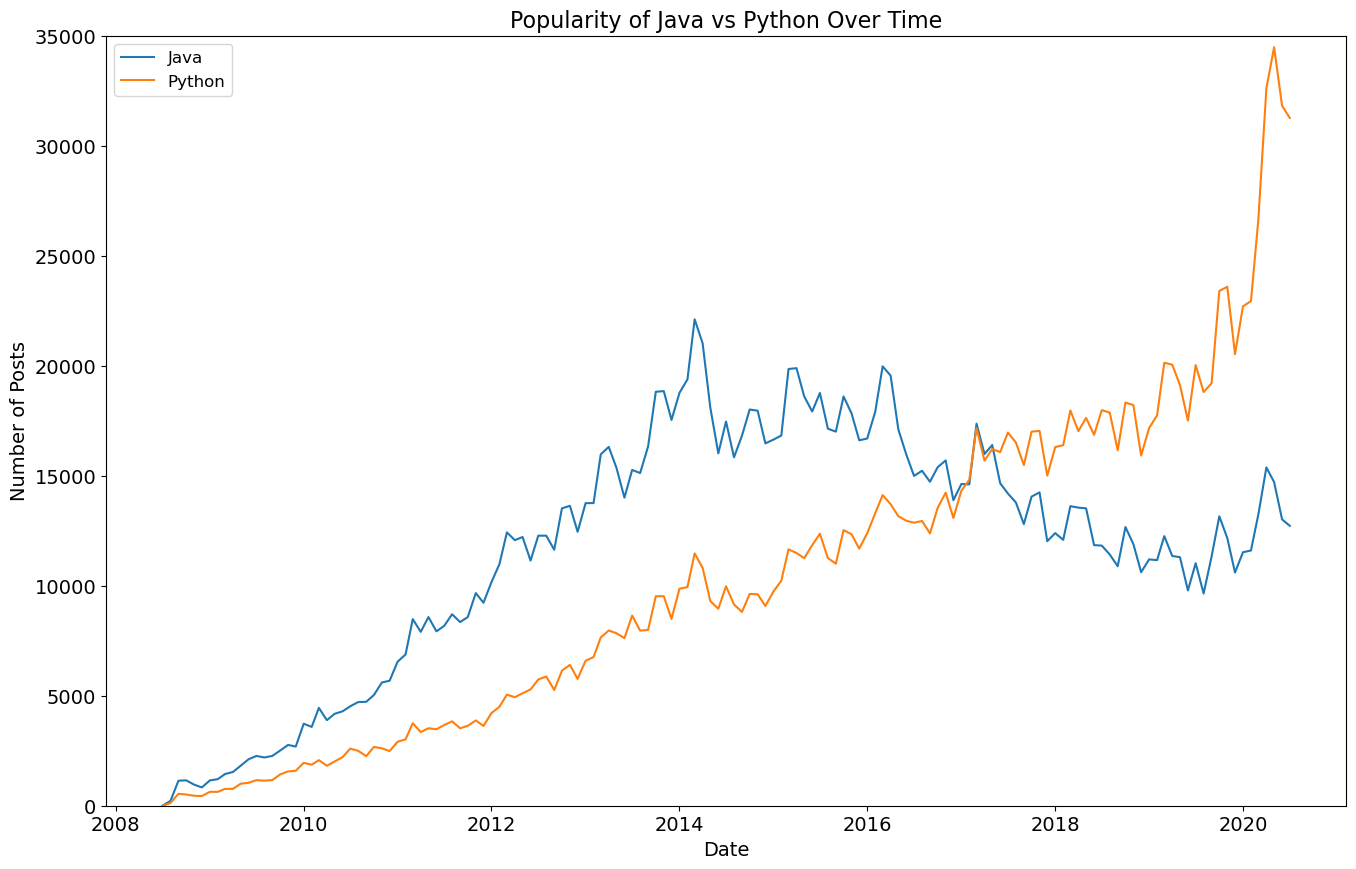

In [32]:
# Plot two programming languages (Java & Python) on the same chart
plt.figure(figsize=(16,10))  # Make chart larger

# Axis labels and style
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot Java
plt.plot(reshaped_df.index, reshaped_df['java'], label="Java")

# Plot Python
plt.plot(reshaped_df.index, reshaped_df['python'], label="Python")

# Add legend
plt.legend(fontsize=12)
plt.title("Popularity of Java vs Python Over Time", fontsize=16)

plt.show()

### 2: Plotting all programming languages

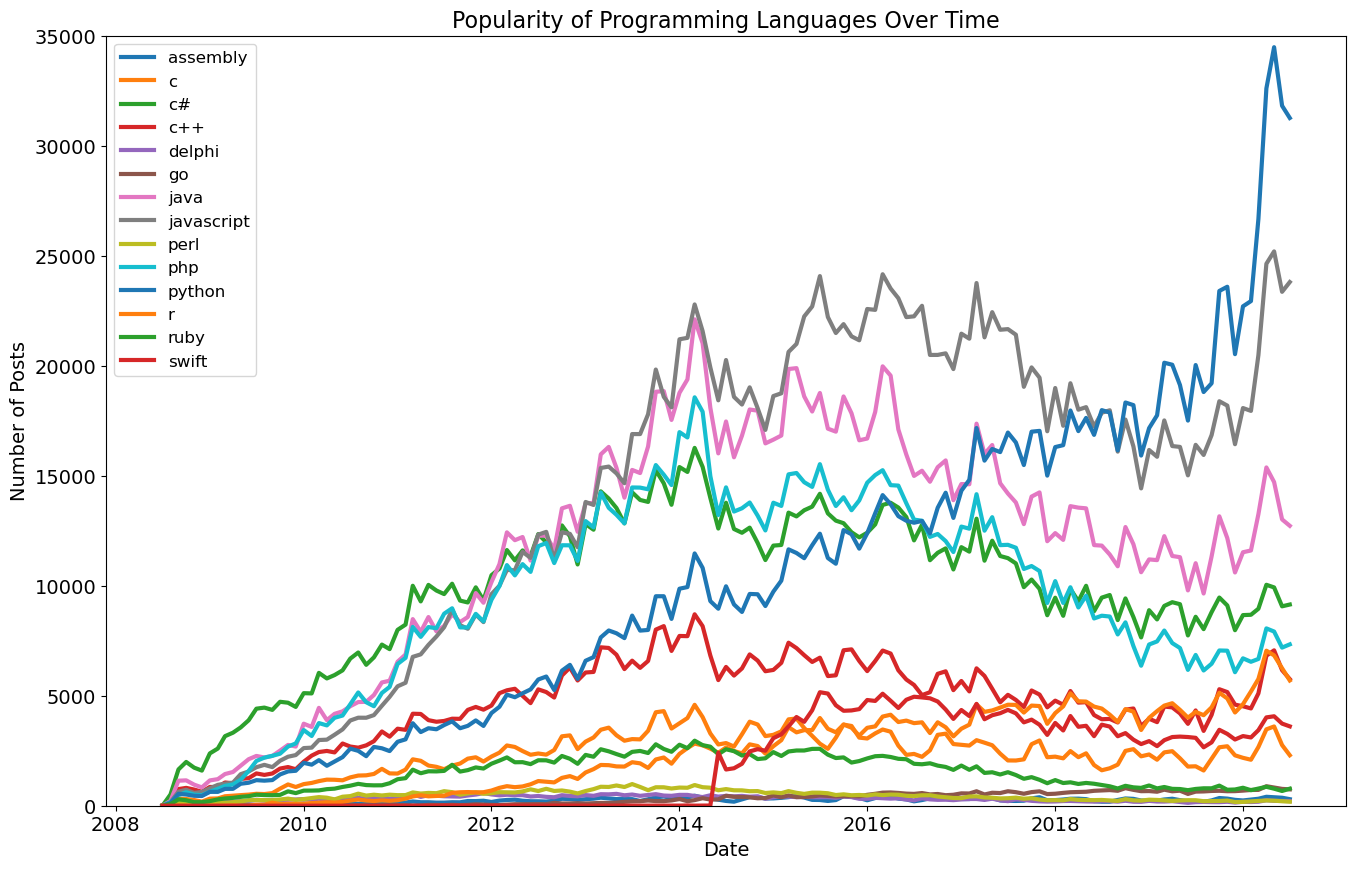

In [33]:
# Plot ALL programming languages in the dataset
plt.figure(figsize=(16,10))

# Configure axis labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Loop through each column (each programming language) and plot it
for column in reshaped_df.columns:
    plt.plot(
        reshaped_df.index, 
        reshaped_df[column], 
        linewidth=3,               # make lines thicker
        label=reshaped_df[column].name  # use column name as label
    )

# Add legend
plt.legend(fontsize=12)
plt.title("Popularity of Programming Languages Over Time", fontsize=16)

plt.show()

# Smoothing Time Series Data

Time series data can often be noisy, with many upward and downward spikes. To better observe the overall trend, we can calculate and plot a **rolling mean**—an average over a fixed number of observations, such as 6 or 12.

A rolling mean is calculated by taking the average of a fixed window of data points and then moving the window forward by one observation at a time.  

Pandas provides convenient methods to compute rolling means:

- [`rolling()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) – creates a rolling window object.
- [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html) – calculates the mean of values within the rolling window.

### Why Do We Need Smoothing?

When we plotted the raw time-series data of programming language popularity, we noticed many spikes and fluctuations:

- These spikes make the chart noisy and sometimes hard to interpret.
- In practice, we are often more interested in the **overall trend** (whether a language is becoming more or less popular) rather than every small monthly variation.

To address this, we use a technique called the **Rolling Mean (Moving Average)**:

- It smooths the curve by averaging a fixed number of past observations.
- For example, with a window size of 6, each point on the smoothed line represents the average of the last 6 months.

This technique makes the underlying trend much clearer.

### Introducing Rolling Mean

Pandas makes it easy to calculate rolling means using two key methods:

- `.rolling(window=N)` → creates a **sliding window** of size `N`.
- `.mean()` → calculates the **average** of values within that window.

By chaining these methods together, we can create a **smoothed DataFrame** that highlights the underlying trend.


#### Compute the rolling mean

In [34]:
# Create a new DataFrame with rolling mean applied
# Window = 6 means we are averaging over the last 6 months
roll_df = reshaped_df.rolling(window=6).mean()

# Display first few rows to check
roll_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Why Window Size Matters

The choice of the `window` parameter is important when calculating a rolling mean:

- **Smaller window** (e.g., 3): captures short-term changes but can still be somewhat noisy.
- **Larger window** (e.g., 12): produces a much smoother curve, highlighting the long-term trend, but may hide short-term variations.

It's common to experiment with different window sizes to find the right balance between **smoothness** and **detail**.

#### Plot the smoothed data

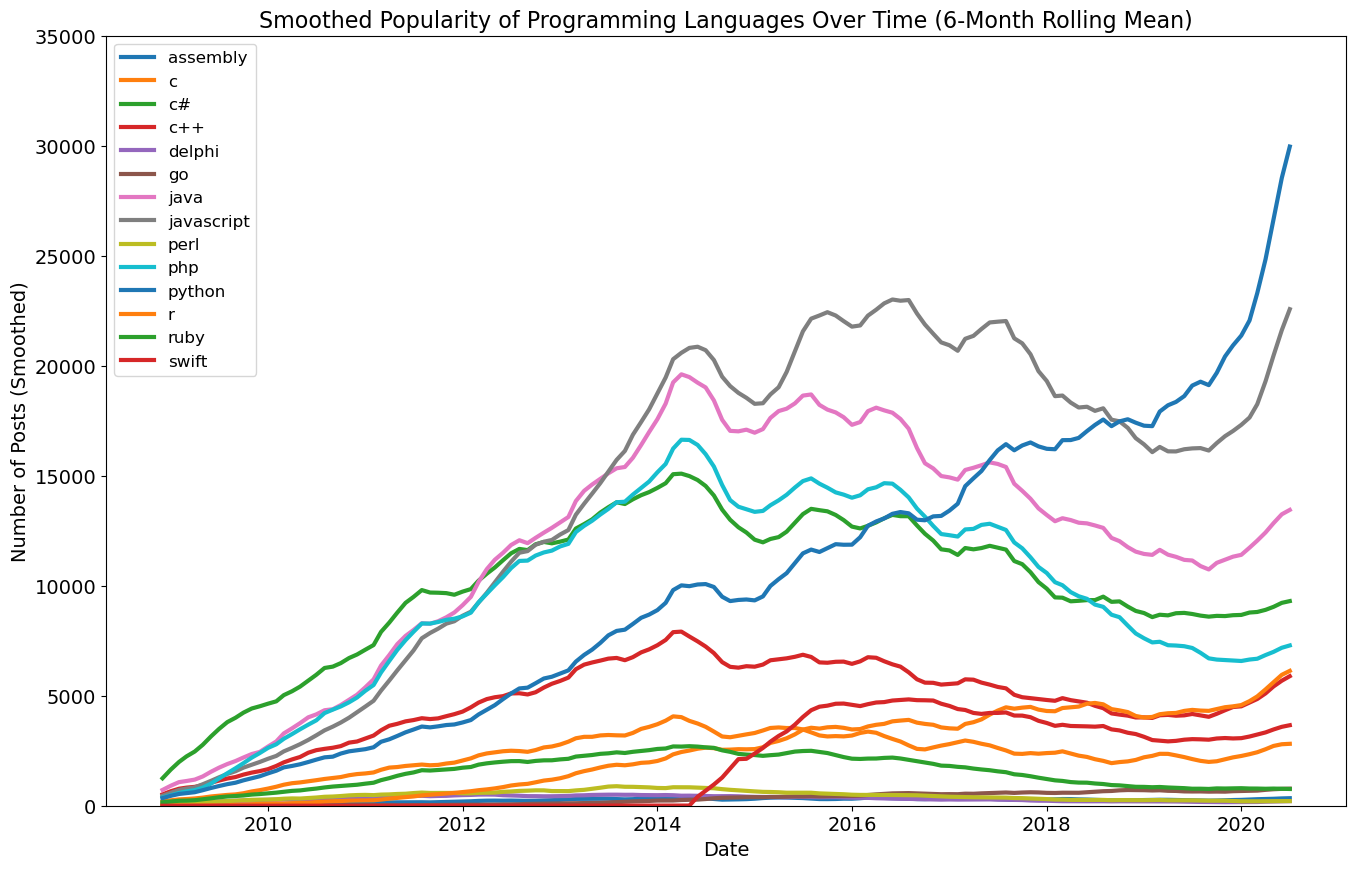

In [35]:
# Plot the rolling mean instead of the raw data
plt.figure(figsize=(16,10))

# Style the axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts (Smoothed)', fontsize=14)
plt.ylim(0, 35000)

# Plot all programming languages using the smoothed DataFrame
for column in roll_df.columns:
    plt.plot(
        roll_df.index, 
        roll_df[column], 
        linewidth=3, 
        label=roll_df[column].name
    )

# Add legend for clarity
plt.legend(fontsize=12)
plt.title("Smoothed Popularity of Programming Languages Over Time (6-Month Rolling Mean)", fontsize=16)

plt.show()

# Key Takeaway

By applying a **rolling mean**, we reduce the noise in our dataset:

- The smoothed chart makes the **overall trends** (e.g., Python’s growth, decline of older languages) much clearer.
- Short-term month-to-month volatility is suppressed, allowing us to focus on the **bigger picture**.

👉 This is why **smoothing** is such a powerful tool for analyzing time-series data in data science.

## Exercise 1: Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts ?

In [37]:
# Filter the DataFrame for dates between 2008 and 2012
mask = (reshaped_df.index >= '2008-01-01') & (reshaped_df.index <= '2012-12-31')
df_2008_2012 = reshaped_df.loc[mask]

In [38]:
# Sum posts per language over the selected period
total_posts_2008_2012 = df_2008_2012.sum().sort_values(ascending=False)
total_posts_2008_2012

TAG
c#            380295.0
java          326416.0
php           302387.0
javascript    291184.0
c++           161887.0
python        148417.0
c              76816.0
ruby           59443.0
perl           22765.0
r              20814.0
delphi         17894.0
assembly        6899.0
go              1509.0
swift            142.0
dtype: float64

In [39]:
# Most popular language
most_popular = total_posts_2008_2012.idxmax()
most_popular_count = total_posts_2008_2012.max()

print(f"The most popular programming language from 2008 to 2012 was {most_popular} with {most_popular_count} posts.")

The most popular programming language from 2008 to 2012 was c# with 380295.0 posts.


In [40]:
# Select top 3 languages by total posts from 2008–2012
top_3_languages = total_posts_2008_2012.head(3)
top_3_languages

TAG
c#      380295.0
java    326416.0
php     302387.0
dtype: float64

#### Plot the top 3 languages

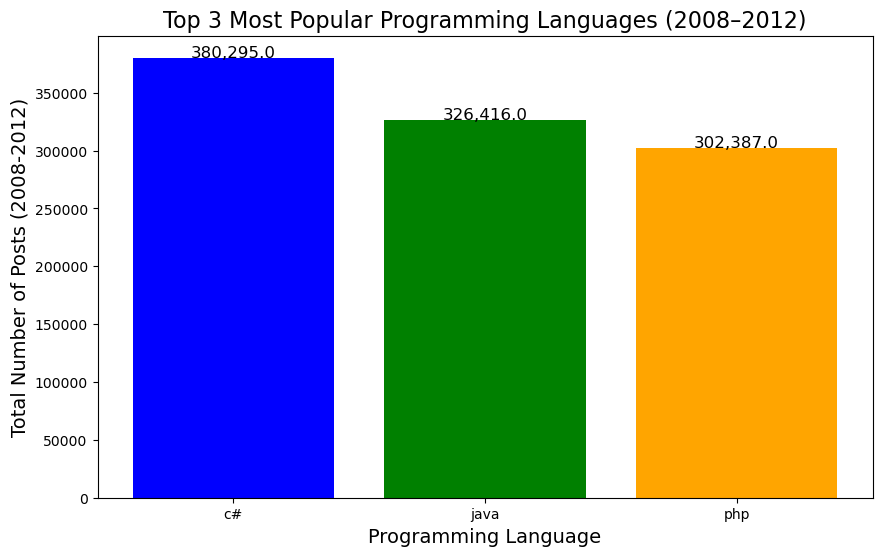

In [41]:
# Plot a bar chart for top 3 languages
plt.figure(figsize=(10,6))

# Bar chart
plt.bar(top_3_languages.index, top_3_languages.values, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel("Programming Language", fontsize=14)
plt.ylabel("Total Number of Posts (2008-2012)", fontsize=14)
plt.title("Top 3 Most Popular Programming Languages (2008–2012)", fontsize=16)

# Show exact counts on top of bars
for i, value in enumerate(top_3_languages.values):
    plt.text(i, value + 500, f"{value:,}", ha='center', fontsize=12)

plt.show()

## Top Programming Languages Over Different Time periods



#### Define function for filtering and plotting

In [43]:
# Import matplotlib if not already imported
import matplotlib.pyplot as plt

# Function to filter data, get top 3 languages, and plot
def plot_top_languages(df, start_date, end_date, period_name, colors=['#1f77b4', '#ff7f0e', '#2ca02c']):
    """
    df: reshaped DataFrame with programming languages as columns
    start_date: start of period (str)
    end_date: end of period (str)
    period_name: label for chart title
    colors: list of colors for bars
    """
    # Step 1: Filter dataset for the given period
    mask = (df.index >= start_date) & (df.index <= end_date)
    df_period = df.loc[mask]
    
    # Step 2: Sum total posts per language
    total_posts = df_period.sum().sort_values(ascending=False)
    
    # Step 3: Select top 3 languages
    top_3 = total_posts.head(3)
    
    # Step 4: Plot bar chart
    plt.figure(figsize=(10,6))
    plt.bar(top_3.index, top_3.values, color=colors)
    
    # Add labels and title
    plt.xlabel("Programming Language", fontsize=14)
    plt.ylabel("Total Number of Posts", fontsize=14)
    plt.title(f"Top 3 Programming Languages ({period_name})", fontsize=16)
    
    # Annotate exact values on bars
    for i, value in enumerate(top_3.values):
        plt.text(i, value + 500, f"{value:,}", ha='center', fontsize=12)
    
    plt.show()
    
    return top_3

### Plot 2015 - 2018

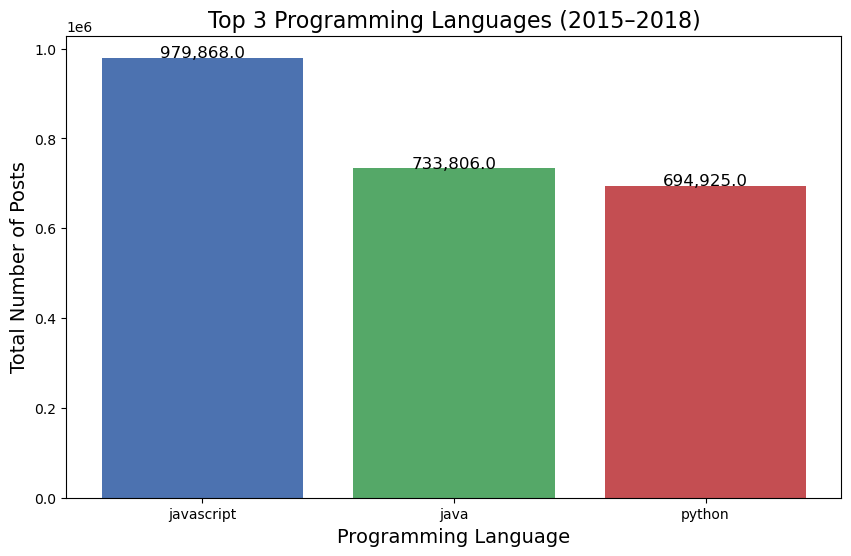

In [44]:
top_3_2015_2018 = plot_top_languages(
    reshaped_df, 
    start_date='2015-01-01', 
    end_date='2018-12-31', 
    period_name='2015–2018',
    colors=['#4c72b0', '#55a868', '#c44e52']
)

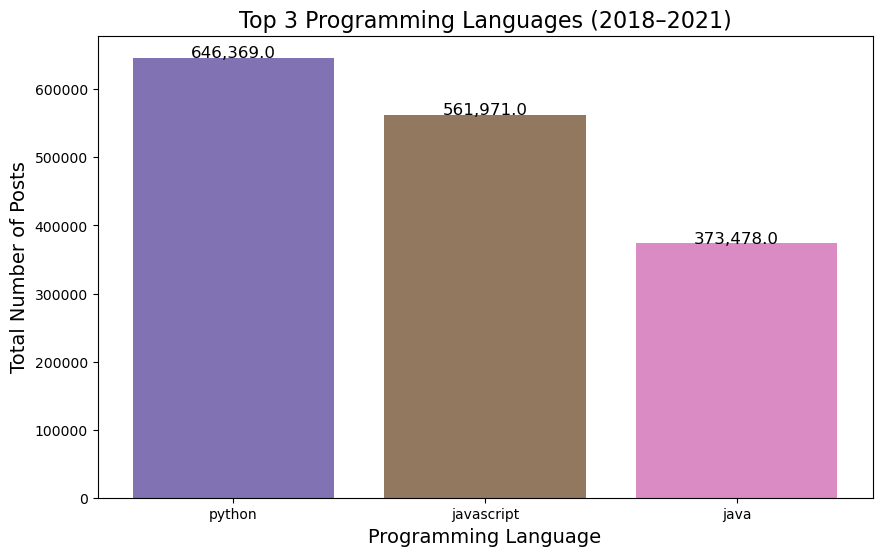

In [47]:
top_3_2018_2021 = plot_top_languages(
    reshaped_df, 
    start_date='2018-01-01', 
    end_date='2021-12-31', 
    period_name='2018–2021',
    colors=['#8172b3', '#937860', '#da8bc3']
)

## Top 3 Languages of the year 2020

In [49]:
# Filter dataset for the year 2020
mask_2020 = (reshaped_df.index >= '2020-01-01') & (reshaped_df.index <= '2020-12-31')
df_2020 = reshaped_df.loc[mask_2020]

# Sum total posts per language for 2020
total_posts_2020 = df_2020.sum().sort_values(ascending=False)

# Select top 3 languages
top_3_2020 = total_posts_2020.head(3)
top_3_2020

TAG
python        202471.0
javascript    153498.0
java           92203.0
dtype: float64

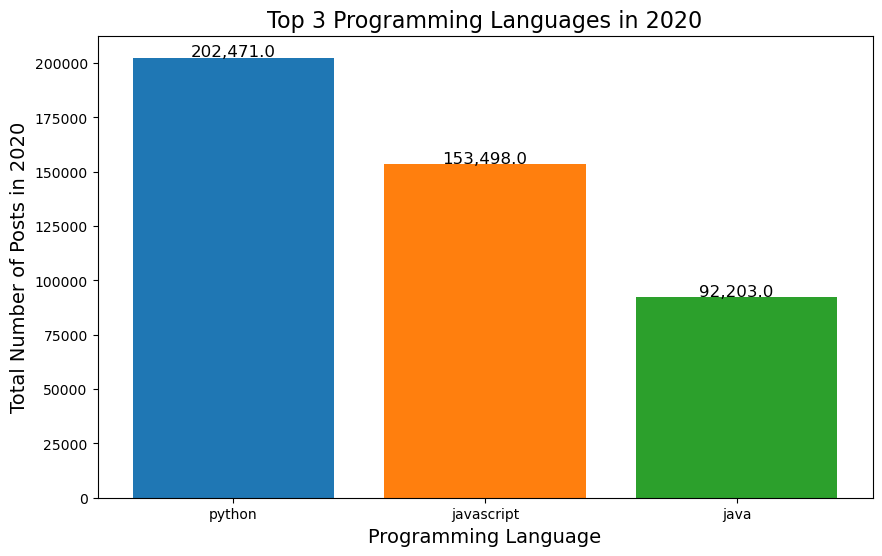

In [50]:
# Plot a bar chart for the top 3 languages in 2020
plt.figure(figsize=(10,6))

# Bar chart with professional colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(top_3_2020.index, top_3_2020.values, color=colors)

# Add axis labels and title
plt.xlabel("Programming Language", fontsize=14)
plt.ylabel("Total Number of Posts in 2020", fontsize=14)
plt.title("Top 3 Programming Languages in 2020", fontsize=16)

# Annotate bars with exact counts
for i, value in enumerate(top_3_2020.values):
    plt.text(i, value + 500, f"{value:,}", ha='center', fontsize=12)

plt.show()